In [80]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from langdetect import detect # language detection
import numpy as np # linear algebra
import tqdm # progress bar
import re # regular expressions
import pickle as pkl # saving and loading pythonic data

## Import custom libraries

In [81]:
import sys, os # system specific parameters and functions
sys.path.append(os.getcwd() + "/../") # add parent directory to path
from src.data_preprocessing import DataPreprocessing

### Load the data

In [82]:
dp = DataPreprocessing(df_path="../data/real_estate_ads_2022_10.csv", 
                       train_indices_path="../data/train_indices.npy", 
                       test_indices_path="../data/test_indices.npy")

In [83]:
dp.Y

,standard_cbrt_price_per_m
0,-1.418692
1,-0.950694
2,-1.677240
3,-0.346889
4,-0.268792
...,...
73640,-0.270301
73641,-0.517942
73642,-0.952708
73643,-0.775382


In [84]:
df = dp.X
df

,market,created_at_first,updated_at,district_lon,district_lat,title,description,params,no_rooms,m,map_lon,map_lat
0,secondary,2019-04-09 16:12:54.000,2019-04-15 18:54:38.000,16.90502,52.41180,Mieszkanie z potencjałem. Rynek Jeżycki.,<p>Zapraszam do zakupu mieszkania zlokalizowan...,price<=>price<br>price<=>260000<br>price[curre...,2,51.00,16.896592,52.410150
1,secondary,2019-04-25 17:20:01.000,2019-05-27 11:36:14.000,16.87466,52.41572,Okazja Jeżyce!!!!!,<p>Polecam na sprzedaż mieszkanie kawalerka o ...,price<=>price<br>price<=>155000<br>price[curre...,1,26.00,16.904410,52.411919
2,secondary,2018-08-02 16:40:35.000,2021-11-28 01:56:53.000,16.90502,52.41180,"**Okazja * 60,1m2 * 3 pokoje * poddasze * Jeży...",<p> **Przestronne mieszkanie 3 pokojowe * na ...,price<=>price<br>price<=>280000<br>price[curre...,3,60.10,16.899310,52.413357
3,secondary,2019-12-05 12:45:49.000,2020-01-15 16:05:42.000,16.87466,52.41572,"Mieszkanie 2-pokojowe, Ogrody, Kampus Uam",<p>Serdecznie zapraszam do zapoznania się z of...,price<=>price<br>price<=>339000<br>price[curre...,2,47.00,16.883608,52.410662
4,secondary,2020-01-10 14:53:19.000,2020-02-13 15:25:07.000,16.87466,52.41572,Jeżyce 2 pokoje,<p>Polecam na sprzedaż mieszkanie z komórka lo...,price<=>price<br>price<=>325000<br>price[curre...,2,44.00,16.890796,52.412308
...,...,...,...,...,...,...,...,...,...,...,...,...
73640,secondary,2019-07-16 22:38:08.000,2019-10-14 23:01:42.000,16.94080,52.38356,Poznań - Rataje idealny układ pomieszczeń.,"<p>Drodzy Państwo,</p>\r\n<p>Zapraszam do zapo...",price<=>price<br>price<=>347000<br>price[curre...,3,47.00,16.955818,52.389898
73641,secondary,2019-07-17 11:18:30.000,2019-08-07 14:22:54.000,16.94080,52.38356,2 pokojowe z balkonem RATAJE os. Piastowskie,<p>Polecam na sprzedaż mieszkanie 2 pokojowe u...,price<=>price<br>price<=>299000<br>price[curre...,2,43.70,16.947615,52.392968
73642,secondary,2019-07-16 13:40:35.000,2019-07-23 00:30:42.000,16.90590,52.36596,"Inwestycyjne 2 niezależne pokoje, do wykończenia.",<p>Na sprzedaż przestronne mieszkanie położone...,price<=>price<br>price<=>270000<br>price[curre...,2,45.32,16.904862,52.369679
73643,secondary,2019-07-03 20:50:27.000,2022-06-17 17:14:34.000,16.94080,52.38356,Przestronna kawalerka z dużym tarasem Chartowo...,<p>Kontakt w sprawie oferty - Katarzyna Piotro...,price<=>price<br>price<=>229000<br>price[curre...,1,36.30,16.980725,52.389168


## Clean the description text

In [85]:
def clean_html_tags(text):
    # Remove HTML tags using regex
    clean_text = re.sub(r'<[^>]+>', '', text)
    
    # Replace multiple consecutive spaces or newlines with a single space
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()
    
    return clean_text

df["description"] = df["description"].apply(clean_html_tags)

## Get the language of the texts
This may require some time (around 5-15 minutes)

In [86]:
from langdetect import detect
def detect_if_not_nan(x):
    try: return detect(x) if (not pd.isnull(x) ) else np.nan
    except: return np.nan

languages_df = pd.DataFrame()
languages_df["Title language"] = df["title"].apply(detect_if_not_nan)

In [ ]:
# Apply tqdm to pandas apply method
tqdm.tqdm.pandas()
languages_df["Description language"] = df["description"].progress_apply(detect_if_not_nan)

In [ ]:
languages_df.to_csv('../data/languages.csv')

You can also load the pre-computed df

In [ ]:
languages_df = pd.read_csv('../data/languages.csv')[["Title language", "Description language"]]

### Get the languages for the title

In [ ]:
languages_df["Title language"].value_counts()

Title language
pl    63804
hr     1875
sl      475
id      469
hu      309
sk      190
en      178
ca      164
sw      157
af      152
pt      146
lt       76
so       70
tr       68
ro       66
de       61
cs       55
no       51
tl       40
sv       37
lv       21
nl       20
fi       19
it       16
et       12
cy       12
es        9
da        6
ru        6
uk        5
vi        4
fr        3
bg        1
mk        1
Name: count, dtype: int64

In [ ]:
languages_df["Title language"].value_counts(normalize=True)

Title language
pl    0.930386
hr    0.027341
sl    0.006926
id    0.006839
hu    0.004506
sk    0.002771
en    0.002596
ca    0.002391
sw    0.002289
af    0.002216
pt    0.002129
lt    0.001108
so    0.001021
tr    0.000992
ro    0.000962
de    0.000889
cs    0.000802
no    0.000744
tl    0.000583
sv    0.000540
lv    0.000306
nl    0.000292
fi    0.000277
it    0.000233
et    0.000175
cy    0.000175
es    0.000131
da    0.000087
ru    0.000087
uk    0.000073
vi    0.000058
fr    0.000044
bg    0.000015
mk    0.000015
Name: proportion, dtype: float64

### Getting the language for the description

In [ ]:
languages_df["Description language"].value_counts()

In [ ]:
languages_df["Description language"].value_counts(normalize=True)

In [ ]:
df[languages_df["Description language"] == "en"]["description"]

In [ ]:
df["description"].tolist()[1]

## Language conclusions
The most prominent language seems to be Polish.
Although there are more languages, it seems to be sometimes due to missclassification, and sometimes due to some postings being i.e. in English.

This should be taken into account in more advanced models. However, in this case, and due to the very predominant presence of Polish, we would not take this into account.

# Word2Vec embeddings
We could get embeddings from Titles and Descriptions, which would allow to generate features.
Although these features may not be easily explainable (without doing further work), embeddings could be very useful, as raw features, or for training a clustering model, or others.

We use Word2Vec since it is easier to train than models such as Transformers, or due to costs / privacy issues when using pre-trained models as ada-embeddings-002.



In [ ]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords # Not supporting Polish :/
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer # Not supporting Polish :/
from pystempel import Stemmer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

with open("../data/polish.stopwords.txt", "r") as file:
    polish_stopwords = file.read().splitlines()

stop_words = set(polish_stopwords)
stemmer = Stemmer.default()

def preprocess_sentence(sentence):

    sentence = str(sentence)
    

    # Convert to lowercase
    sentence = sentence.lower()
    
    # Remove special characters and numbers
    # (although numbers may be useful in some cases)
    # (for time constraints, I don't experiment on this)
    sentence = re.sub(r'\d+|\W+', ' ', sentence)
    
    # Tokenize the sentence
    words = word_tokenize(sentence)
    
    # Remove stopwords and apply stemming
    processed_words = [stemmer(word) for word in words if word not in stop_words]
    
    return processed_words

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
Loading: 100%|██████████| 2225192/2225192 [00:01<00:00, 1206208.26bytes/s]


### Preprocess the sentences

In [ ]:
tqdm.tqdm.pandas()
preprocessed_descriptions = df["description"].progress_apply(preprocess_sentence)

In [ ]:
preprocessed_descriptions.to_csv("../data/preprocessed_descriptions.csv")

In [ ]:
preprocessed_titles = df["title"].progress_apply(preprocess_sentence)

In [ ]:
preprocessed_titles.to_csv("../data/preprocessed_titles.csv")

Load the preprocessed titles and descriptions

In [ ]:
preprocessed_descriptions = pd.read_csv("../data/preprocessed_descriptions.csv")["description"]
preprocessed_titles = pd.read_csv("../data/preprocessed_titles.csv")["title"]

In [ ]:
preprocessed_titles = preprocessed_titles.tolist()
preprocessed_descriptions = preprocessed_descriptions.tolist()

## Train Word2Vec

In [ ]:
model_titles = Word2Vec(sentences=preprocessed_titles, vector_size=50, window=5, min_count=1, workers=4)

with open("../data/word2vec_titles.pkl", "wb") as file:
    pkl.dump(model_titles, file)


In [ ]:
model_descriptions = Word2Vec(sentences=preprocessed_descriptions, vector_size=50, window=5, min_count=1, workers=4)

with open("../data/word2vec_descriptions.pkl", "wb") as file:
    pkl.dump(model_descriptions, file)

Import the models

In [ ]:
with open("../data/word2vec_titles.pkl", "rb") as file:
    model_titles = pkl.load(file)

with open("../data/word2vec_descriptions.pkl", "rb") as file:
    model_descriptions = pkl.load(file)

### Get sentence embeddings

In [ ]:
def get_sentence_embedding(sentence, model):
    words = preprocess_sentence(sentence)
    if not words:
        # Handle the case where none of the words are in the Word2Vec vocabulary
        return np.zeros(model.vector_size)
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    # Compute the average of the word vectors
    sentence_embedding = np.mean(word_vectors, axis=0)
    return sentence_embedding

In [ ]:
title_embeddings = df["title"].apply(lambda x: get_sentence_embedding(x, model_titles))

c:\Users\sergi\anaconda3\envs\olx\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\sergi\anaconda3\envs\olx\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
title_embeddings.to_csv("../data/title_embeddings.csv")

We observe that most of the embeddings are not computable, probably due to the short length og the titles (thus computing vectors per words is not feasible). We would probably not use these as features, but use other approaches

In [ ]:
title_embeddings.isnull().sum() / len(title_embeddings)

0.7014325480344897

In [ ]:
description_embeddings = df["description"].apply(lambda x: get_sentence_embedding(x, model_descriptions))

KeyboardInterrupt: 

In [ ]:
description_embeddings.to_csv("../data/description_embeddings.csv")

In [ ]:
description_embeddings = pd.read_csv("../data/description_embeddings.csv")["description"]
description_embeddings = description_embeddings.apply(lambda x : x.replace("\n", "") if isinstance(x, str) else x)
description_embeddings = description_embeddings.apply(lambda x : [float(i) for i in x[1:-1].split()] if isinstance(x, str) else x)

In [ ]:
description_embeddings.isnull().sum() / len(description_embeddings)

0.1295403625500713

### See whether the embeddings give interesting information

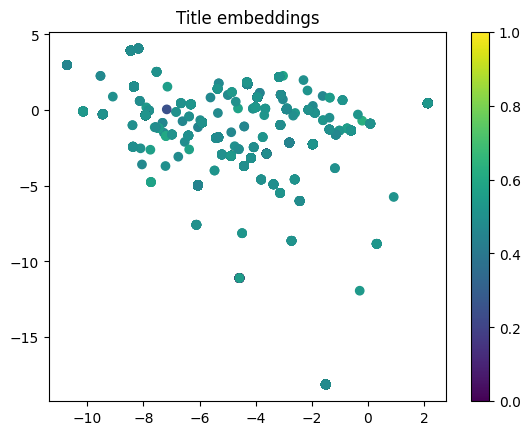

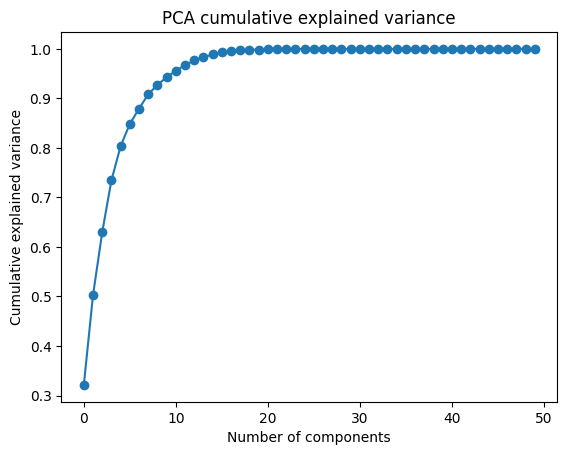

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def plot_pca_embeddings(embeddings, title_or_description, prices_per_m, scale=True, projection_method="PCA",
                        explained_variance=True):

    prices_per_m = prices_per_m[embeddings.notnull()]
    
    prices_per_m_scaler = MinMaxScaler()
    prices_per_m = prices_per_m_scaler.fit_transform(prices_per_m.to_numpy().reshape(-1, 1))

    embeddings = embeddings[embeddings.notnull()].to_numpy()
    embeddings = np.vstack(embeddings) # Stack them to make it a matrix

    if scale:
        scaler = StandardScaler()
        embeddings = scaler.fit_transform(embeddings)

    if projection_method == "PCA":
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(embeddings)

    fig,ax = plt.subplots()
    scatter = ax.scatter(principal_components[:, 0], principal_components[:, 1], c=prices_per_m, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(f"{title_or_description} embeddings")
    plt.show()

    if projection_method == "PCA" and explained_variance:

        pca_dummy = PCA(n_components=embeddings.shape[1])
        pca_dummy.fit(embeddings)
        cumulative_variance_ratio = np.cumsum(pca_dummy.explained_variance_ratio_)
        plt.plot(cumulative_variance_ratio, marker="o")
        plt.xlabel("Number of components")
        plt.ylabel("Cumulative explained variance")
        plt.title("PCA cumulative explained variance")
        plt.show()

    
plot_pca_embeddings(title_embeddings, "Title", dp.Y["standard_cbrt_price_per_m"])

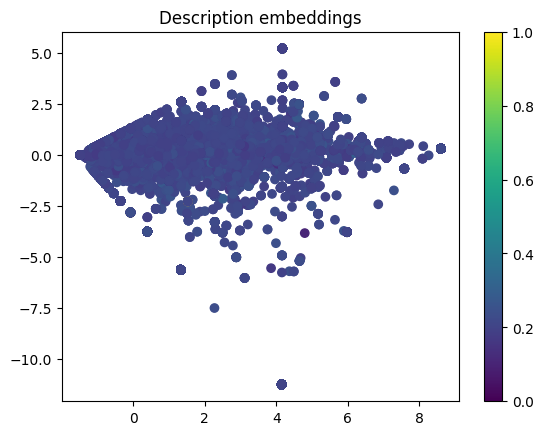

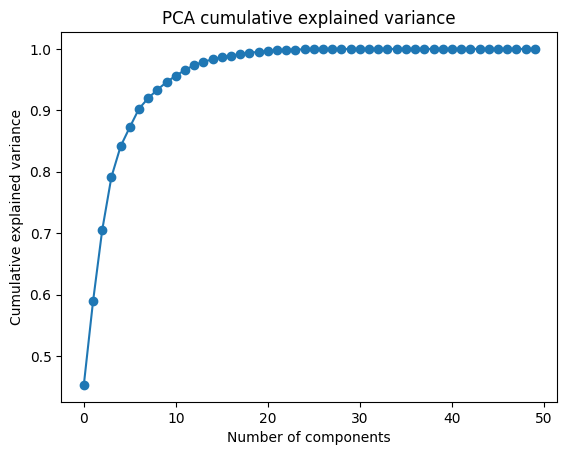

In [ ]:
plot_pca_embeddings(description_embeddings, "Description", dp.Y["standard_cbrt_price_per_m"], scale=False)

# Train a tf-idf model

## Train / test split

In [ ]:
from sklearn.model_selection import train_test_split
train_indices, test_indices = train_test_split(df.index, test_size=0.2, random_state=42)


np.save("../data/train_indices.npy", train_indices.tolist())
np.save("../data/test_indices.npy", test_indices.tolist())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
preprocessed_titles = pd.read_csv("../data/preprocessed_titles.csv")["title"]
preprocessed_descriptions = pd.read_csv("../data/preprocessed_descriptions.csv")["description"]

### For title

In [ ]:
title_tfidf_vectorizer = TfidfVectorizer()

# Transform the text data into TF-IDF features
title_tfidf_matrix = title_tfidf_vectorizer.fit_transform(preprocessed_titles.iloc[train_indices])
y_train = df["price_per_m"].iloc[train_indices]

model_titles = LinearRegression()
model_titles.fit(title_tfidf_matrix, y_train)

y_pred = model.predict(title_tfidf_vectorizer.transform(preprocessed_titles.iloc[test_indices]))
mse = mean_squared_error(df["price_per_m"].iloc[test_indices], y_pred)
print(mse)